<a href="https://colab.research.google.com/github/sahanruwanthasilva/DIP-assignment/blob/main/DIP_assingment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import cv2
from google.colab.patches import cv2_imshow as colab_imshow
import matplotlib.pyplot as plt
import numpy as np

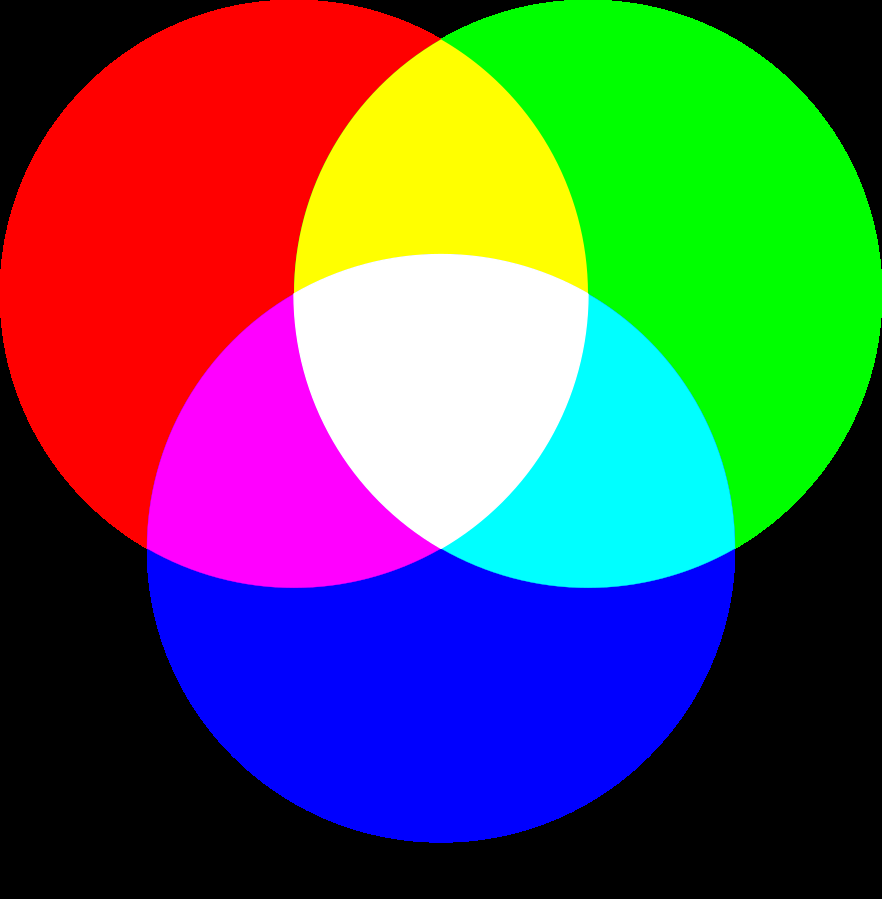

In [10]:
# Question 1 starts here
RGB_image = cv2.imread('/content/RGB.png')
colab_imshow(RGB_image)

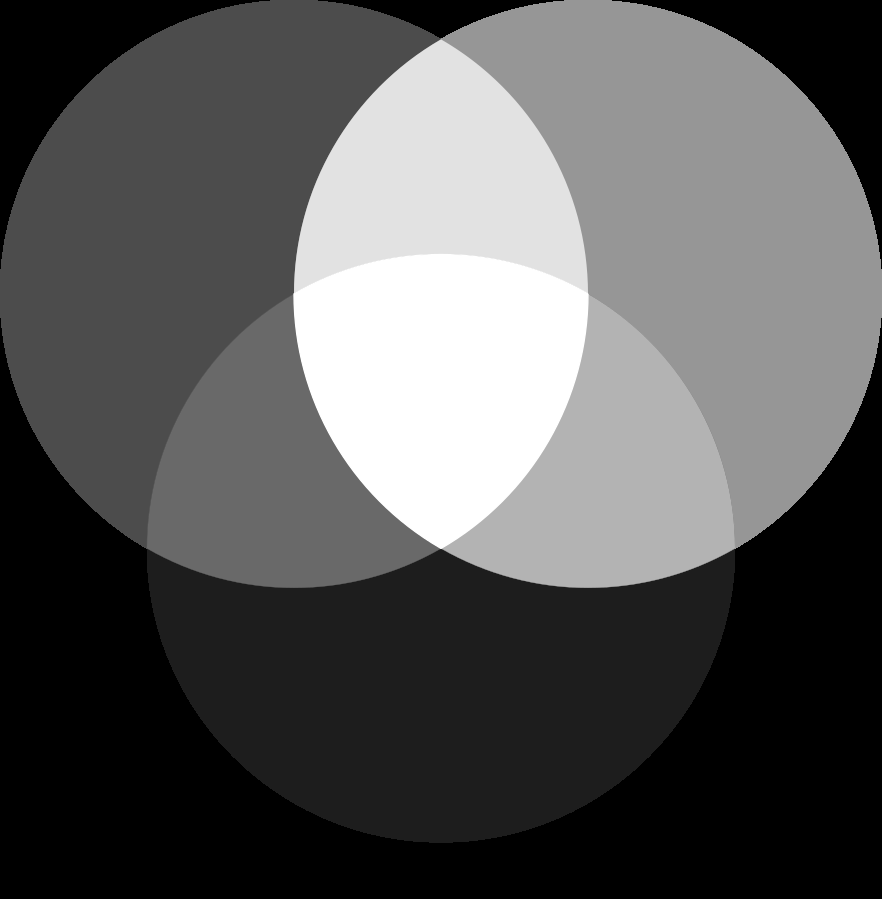

In [13]:
GRAY_image = cv2.cvtColor(RGB_image, cv2.COLOR_BGR2GRAY)
colab_imshow(GRAY_image)

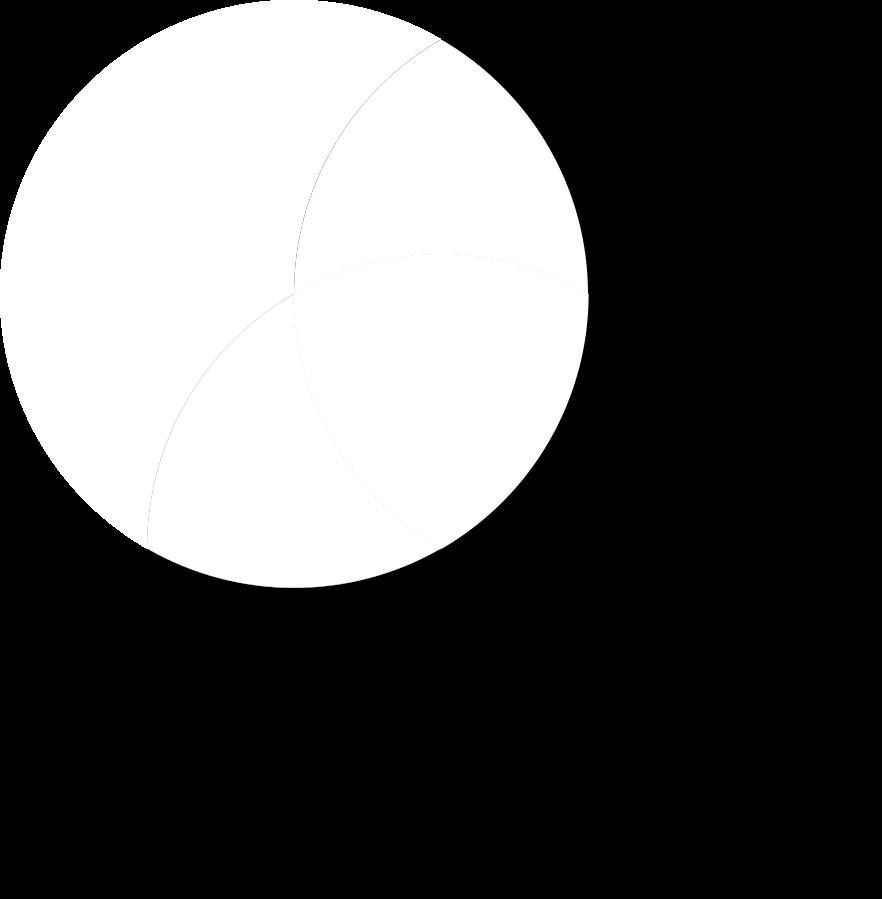

In [18]:
BLUE_channel, GREEN_channel, RED_channel = cv2.split(RGB_image)
colab_imshow(RED_channel)

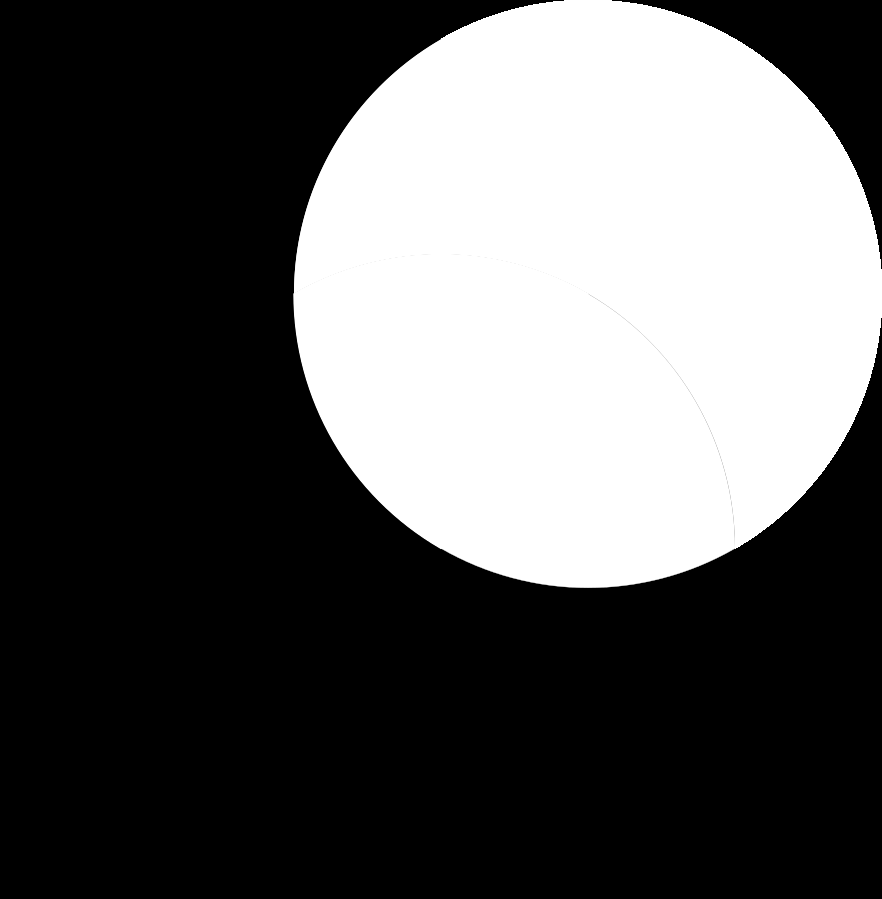

In [19]:
colab_imshow(GREEN_channel)

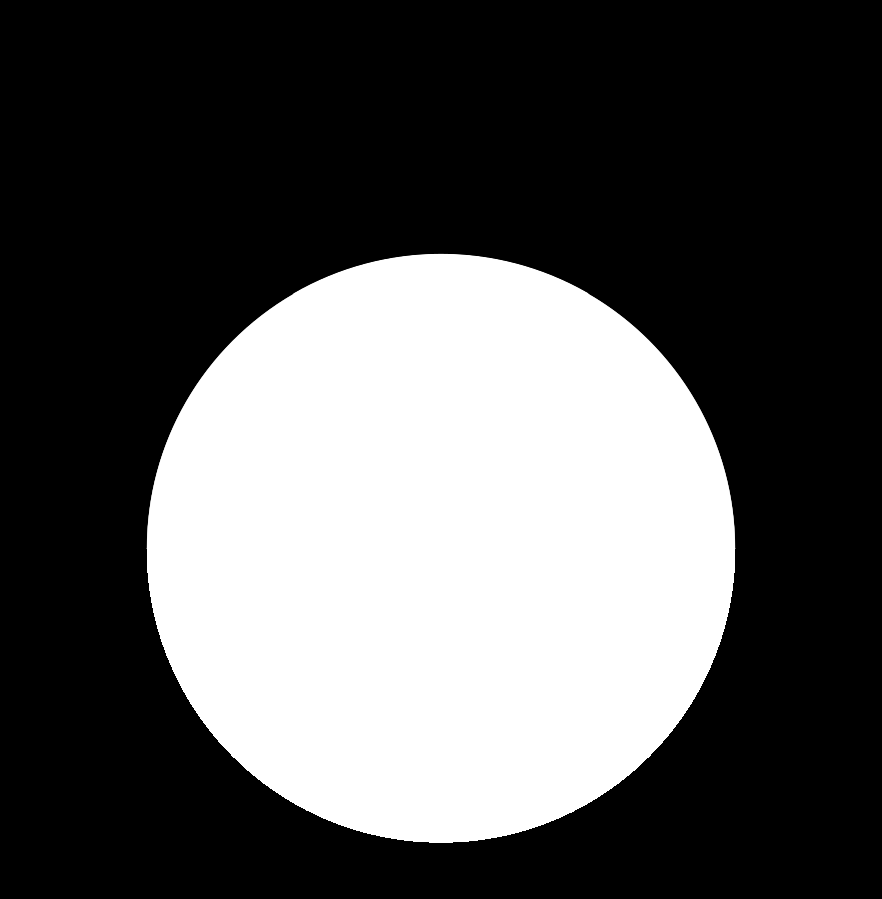

In [20]:
colab_imshow(BLUE_channel)

In [ ]:
#Question 1 ends here

In [33]:
# Question 2 starts here

DARK_image = cv2.imread('/content/Dark Image.jpg', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([DARK_image], [0], None, [256], [0, 256])

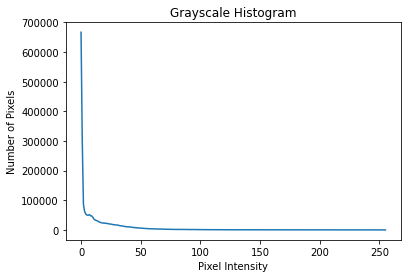

In [34]:
plt.plot(hist)
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.show()

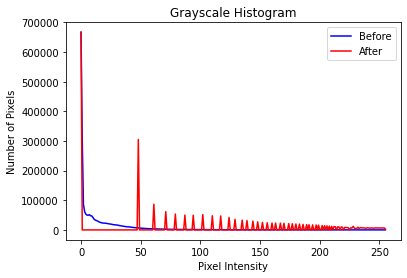

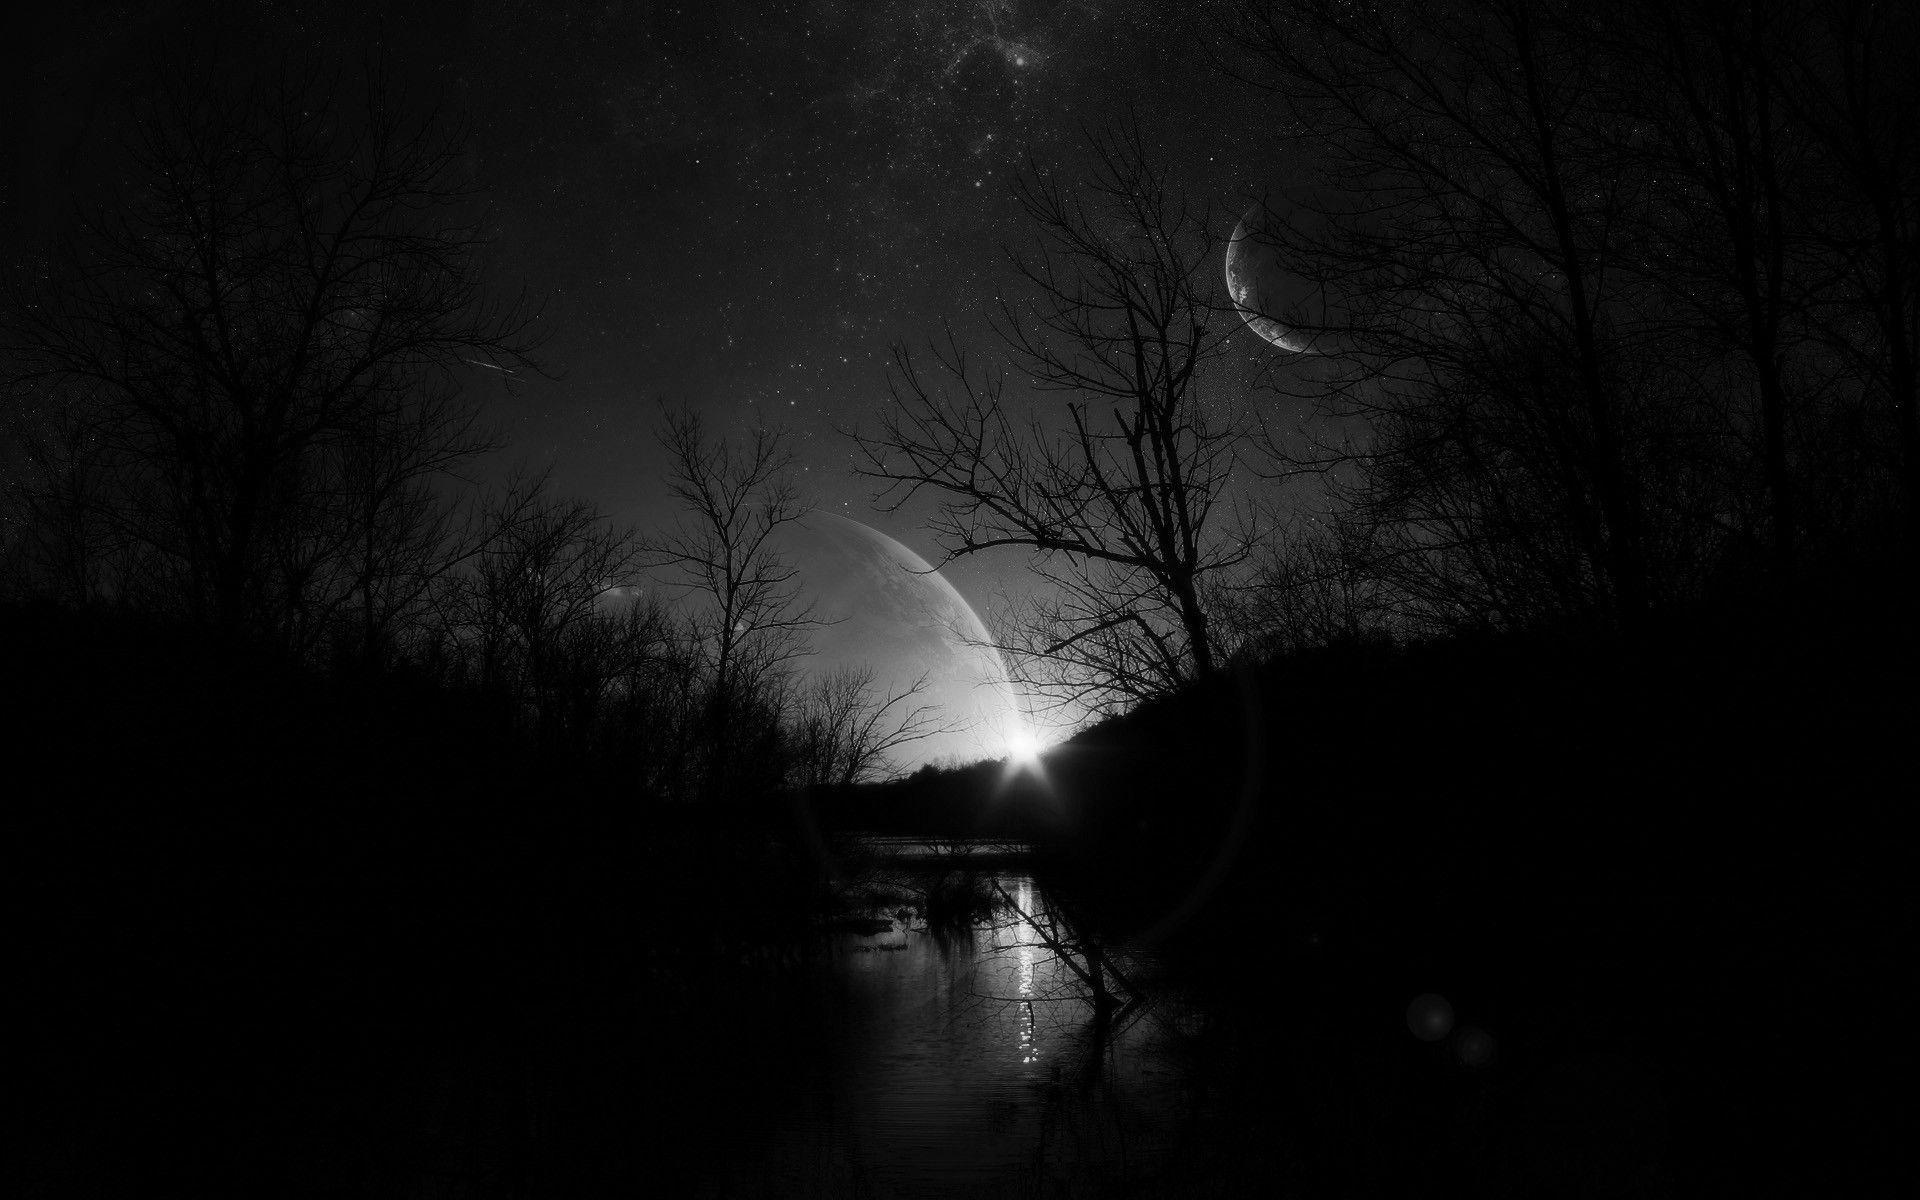

In [36]:
# Apply histogram equalization
img_eq = cv2.equalizeHist(DARK_image)

# Calculate the histograms before and after equalization
hist_before = cv2.calcHist([DARK_image], [0], None, [256], [0, 256])
hist_after = cv2.calcHist([img_eq], [0], None, [256], [0, 256])

# Plot the histograms
plt.plot(hist_before, color='b')
plt.plot(hist_after, color='r')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.legend(['Before', 'After'])
plt.show()

# Display the original and equalized images
colab_imshow(DARK_image)

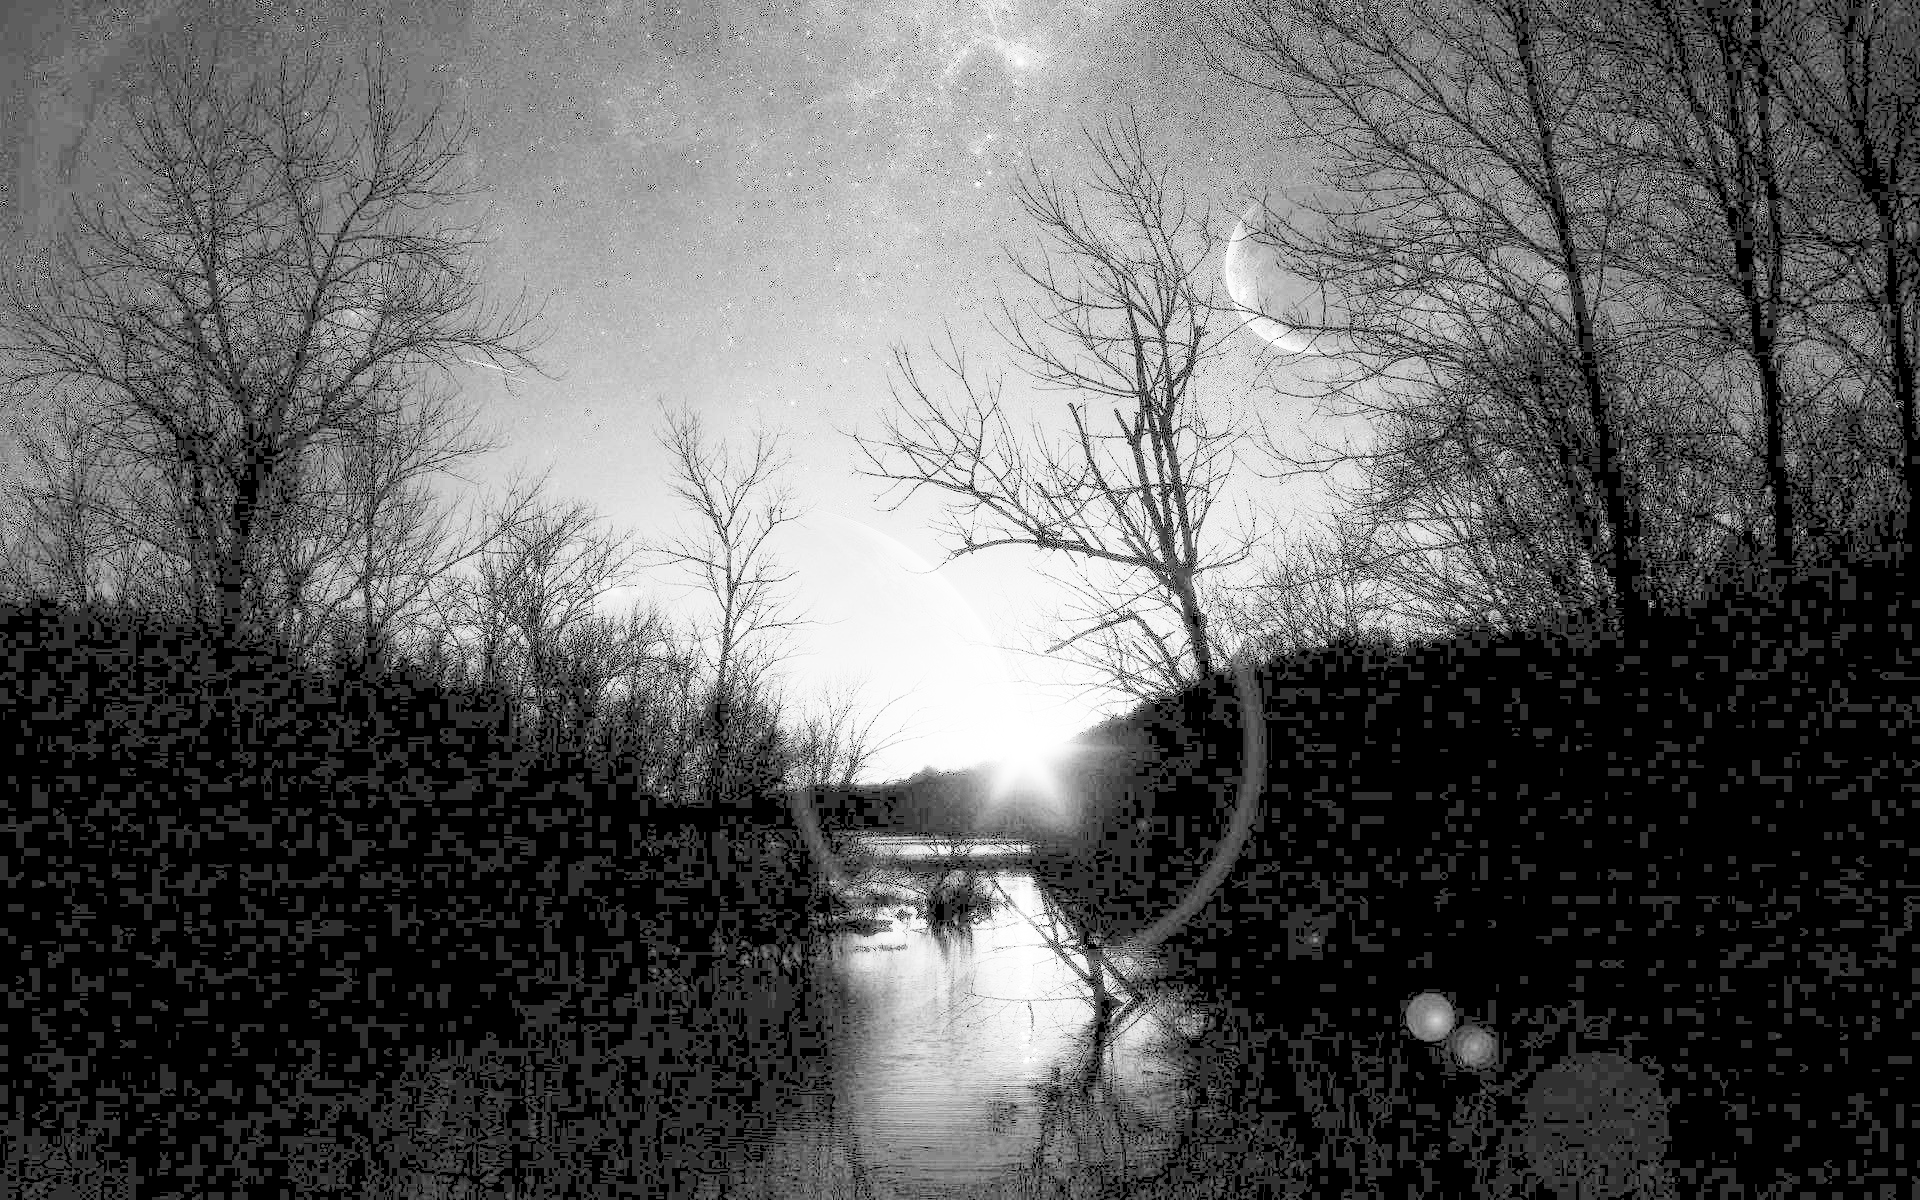

In [37]:
colab_imshow(img_eq)

In [ ]:
# Question 2 ends here

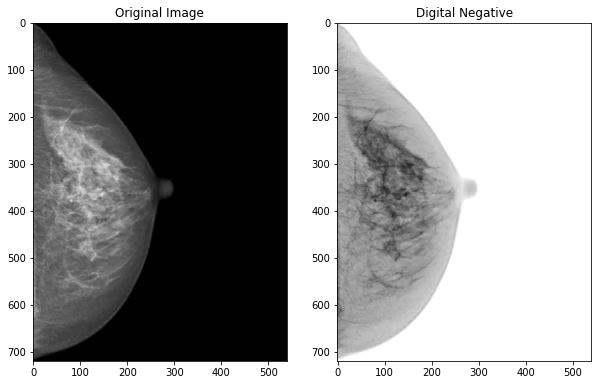

In [38]:
# Qustion 3.1 starts here

img = cv2.imread('/content/breastXray.tif', cv2.IMREAD_GRAYSCALE)

# Obtain the digital negative
neg_img = 255 - img

# Display the original and negative images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(neg_img, cmap='gray')
axs[1].set_title('Digital Negative')
plt.show()

# By displaying both the original and binary thresholded images side by side,
# we can see how the thresholding process simplifies the image and extracts the features of interest,
# which in this case are the craters and surface features of the moon.
# The thresholded image provides a clear representation of the image's main features, making it easier to analyze and interpret.

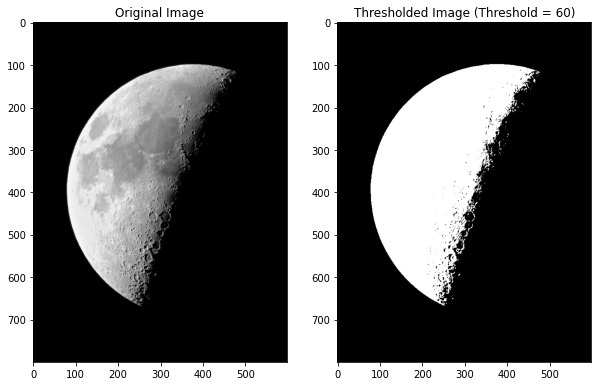

In [39]:
# Qustion 3.2 starts here
img = cv2.imread('/content/moon.tif', cv2.IMREAD_GRAYSCALE)

# Threshold the image
thresh = 60
binary_img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)[1]

# Display the original and binary images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(binary_img, cmap='gray')
axs[1].set_title(f'Thresholded Image (Threshold = {thresh})')
plt.show()

# By displaying both the original and binary thresholded images side by side,
# we can see how the thresholding process simplifies the image and extracts the features of interest, which in this case are the craters and surface features of the moon.
# The thresholded image provides a clear representation of the image's main features, making it easier to analyze and interpret.

<ipython-input-41-ae1f2c4e2614>:5: RuntimeWarning: divide by zero encountered in log
  log_transformed = np.log(c + img)


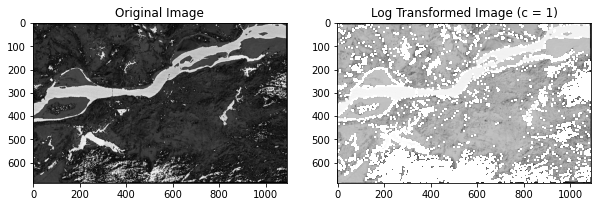

In [41]:
# Qustion 3.3 starts here
img = cv2.imread('/content/DFT_no_log.tif', cv2.IMREAD_GRAYSCALE)

# Apply log transformation
c = 1
log_transformed = np.log(c + img)

# Display the original and transformed images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(log_transformed, cmap='gray')
axs[1].set_title(f'Log Transformed Image (c = {c})')
plt.show()

# The log transformation increases the contrast of the image, making it easier to see the details and features of the image.
# The constant value c is added to prevent taking the log of a value of 0, which would result in an undefined output.
# The value of c can be adjusted to control the brightness and contrast of the transformed image.


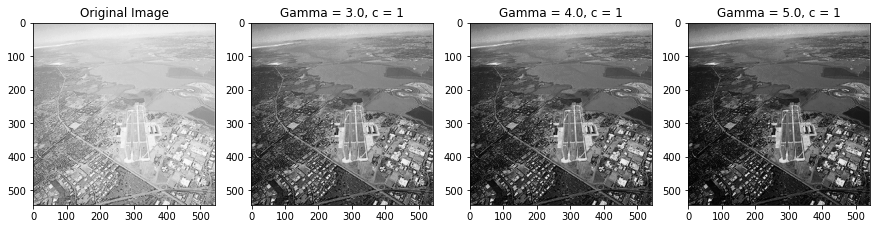

In [42]:
# Qustion 3.4 starts here
img = cv2.imread('/content/washed_aerial.tif', cv2.IMREAD_GRAYSCALE)

# Define gamma values to use
gamma_values = [3.0, 4.0, 5.0]

# Apply power-law transformations with different gamma values
transformed_images = []
for gamma in gamma_values:
    c = 1
    power_transformed = c * (img ** gamma)
    transformed_images.append(power_transformed)

# Create figure with subplots for original and transformed images
fig, axs = plt.subplots(1, 4, figsize=(15, 10))

# Show original image
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')

# Show transformed images with different gamma values
for i, gamma in enumerate(gamma_values):
    axs[i+1].imshow(transformed_images[i], cmap='gray')
    axs[i+1].set_title(f'Gamma = {gamma}, c = 1')

# Display the figure
plt.show()

# The power-law transformations with higher gamma values (4.0 and 5.0) increase the contrast of the image and make the features more visible,
# while the transformation with a lower gamma value (3.0) produces an image with less contrast.
# Increasing the gamma value increases the brightness of the image and can help bring out details that were previously difficult to see.

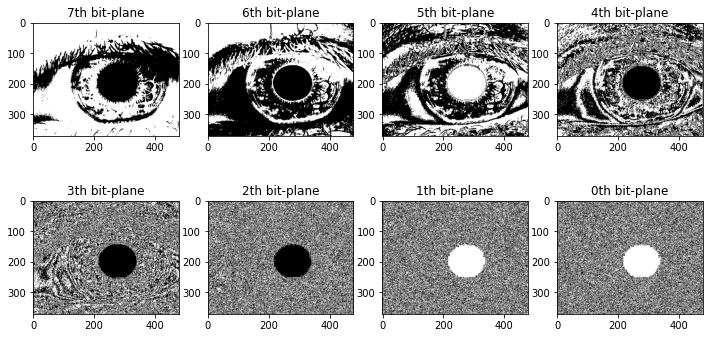

In [43]:
# Qustion 3.5 starts here

img = cv2.imread('/content/fractal_iris.tif', cv2.IMREAD_GRAYSCALE)

# Extract bit-plane images
bit_planes = []
for i in range(8):
    bit_plane = np.bitwise_and(img, 2**i)
    bit_planes.append(bit_plane)

# Create figure with subplots for each bit-plane image
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Show bit-plane images in descending order
for i in range(8):
    row = i // 4
    col = i % 4
    axs[row, col].imshow(bit_planes[7-i], cmap='gray')
    axs[row, col].set_title(f'{7-i}th bit-plane')

# Display the figure
plt.show()

# The result of the code will be an image with eight subplots,
# each showing a bit-plane image from the "fractal_iris.tif" image.
# The leftmost subplot will show the 7th (most significant) bit-plane image
#  and the rightmost subplot will show the 0th (least significant) bit-plane image.
